## PASSING DATA

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 100)

url = 'https://www.pro-football-reference.com/years/2023/passing.htm'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'id': 'passing'})

headers = []
for th in table.find('thead').find_all('th'):
    headers.append(th.text.strip())

rows = []
for tr in table.find('tbody').find_all('tr'):
    cells = [td.text.strip() for td in tr.find_all('td')]
    if cells: 
        rows.append(cells)

passing = pd.DataFrame(rows, columns=headers[1:])
if 'Yds.1' in passing.columns:
    passing = passing.drop(columns=['Yds.1'])
passing = passing[passing['Pos'] == 'QB']

passing.columns = [f'{col}_{i}' if col == 'Yds' else col for i, col in enumerate(passing.columns)]

if 'Yds_25' in passing.columns:
    passing = passing.drop(columns=['Yds_25'])

passing = passing.rename(columns={'Yds': 'Yds_10'})


passing = passing.apply(pd.to_numeric, errors='ignore').fillna(0)
passing['TD/Int'] = round(passing['TD']/passing['Int'],2)

passing = passing[passing['G'] >= 9]
passing.to_csv('nfl_passing_2023.csv', index=False)
passing

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds_10,TD,TD%,Int,Int%,1D,Succ%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Sk%,NY/A,ANY/A,4QC,GWD,TD/Int
0,Tua Tagovailoa*,MIA,25,QB,17,17,11-6-0,388,560,69.3,4624,29,5.2,14,2.5,222,50.8,78,8.3,8.2,11.9,272.0,101.1,60.8,29,4.9,7.56,7.48,2.0,2.0,2.07
1,Jared Goff,DET,29,QB,17,17,12-5-0,407,605,67.3,4575,30,5.0,12,2.0,227,50.9,70,7.6,7.7,11.2,269.1,97.9,60.3,30,4.7,6.89,6.99,2.0,3.0,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,Sam Darnold,SFO,26,QB,10,1,0-1-0,28,46,60.9,297,2,4.3,1,2.2,15,46.2,48,6.5,6.3,10.6,29.7,85.1,49.3,6,11.5,4.94,4.85,0.0,0.0,2.00
69,Taysom Hill,NOR,33,QB,16,7,,6,11,54.5,83,1,9.1,0,0.0,4,46.2,44,7.5,9.4,13.8,5.2,109.3,50.0,2,15.4,6.08,7.62,0.0,1.0,inf


In [2]:
passing2 = passing[['Player', 'Yds_10', 'Cmp%', 'TD/Int', 'ANY/A', 'Sk', 'GWD', '4QC', 'QBR']]
passing2.columns = ['Player', 'Yds', 'Cmp%', 'TD/Int',  'ANY/A', 'Sk', 'GWD', '4QC', 'QBR']
passing2

,Player,Yds,Cmp%,TD/Int,ANY/A,Sk,GWD,4QC,QBR
0,Tua Tagovailoa*,4624,69.3,2.07,7.48,29,2.0,2.0,60.8
1,Jared Goff,4575,67.3,2.50,6.99,30,3.0,2.0,60.3
...,...,...,...,...,...,...,...,...,...
55,Sam Darnold,297,60.9,2.00,4.85,6,0.0,0.0,49.3
69,Taysom Hill,83,54.5,inf,7.62,2,1.0,0.0,50.0


## RUSHING DATA

In [3]:
url = 'https://www.pro-football-reference.com/years/2023/rushing.htm'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'id': 'rushing'})

headers = [th.text.strip() for th in table.find('thead').find_all('th')]

rows = []
for tr in table.find('tbody').find_all('tr'):
    cells = [td.text.strip() for td in tr.find_all('td')]
    if cells:
        rows.append(cells)


rushing = pd.DataFrame(rows, columns=headers[5:]) 

numeric_columns = [
    'Age', 'G', 'GS', 'Att', 'Yds', 'TD', 'Lng', 'Y/A', 'Y/G', 'Fmb'
]

rushing[numeric_columns] = rushing[numeric_columns].apply(pd.to_numeric, errors='coerce')

rushing[numeric_columns] = rushing[numeric_columns].fillna(0)


rushing[numeric_columns] = rushing[numeric_columns].astype(float)
rushing = rushing[rushing['Pos'] == 'QB']

rushing.to_csv('nfl_rushing_2023.csv', index=False)
rushing.rename(columns={'Yds': 'rushing_yds'}, inplace=True)
rushing

,Player,Tm,Age,Pos,G,GS,Att,rushing_yds,TD,1D,Succ%,Lng,Y/A,Y/G,Fmb
34,Jalen Hurts*,PHI,25.0,QB,17.0,17.0,157.0,605.0,15.0,68,61.1,24.0,3.9,35.6,9.0
37,Lamar Jackson*+,BAL,26.0,QB,16.0,16.0,148.0,821.0,5.0,48,54.1,30.0,5.5,51.3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Kyle Trask,TAM,25.0,QB,2.0,0.0,1.0,-1.0,0.0,0,0.0,-1.0,-1.0,-0.5,0.0
344,Logan Woodside,ATL,28.0,QB,1.0,0.0,1.0,6.0,0.0,0,100.0,6.0,6.0,6.0,0.0


In [4]:
for column in rushing.columns:
    print(column, type(column))

Player <class 'str'>
Tm <class 'str'>
Age <class 'str'>
Pos <class 'str'>
G <class 'str'>
GS <class 'str'>
Att <class 'str'>
rushing_yds <class 'str'>
TD <class 'str'>
1D <class 'str'>
Succ% <class 'str'>
Lng <class 'str'>
Y/A <class 'str'>
Y/G <class 'str'>
Fmb <class 'str'>


## COMBINE THE NEEDED COLUMNS

In [5]:
rushing_selected = rushing[['Player', 'rushing_yds']]

combined = pd.merge(passing2, rushing_selected, on='Player', how='left', suffixes=('_pass', '_rush'))
combined

,Player,Yds,Cmp%,TD/Int,ANY/A,Sk,GWD,4QC,QBR,rushing_yds
0,Tua Tagovailoa*,4624,69.3,2.07,7.48,29,2.0,2.0,60.8,74.0
1,Jared Goff,4575,67.3,2.50,6.99,30,3.0,2.0,60.3,21.0
...,...,...,...,...,...,...,...,...,...,...
34,Sam Darnold,297,60.9,2.00,4.85,6,0.0,0.0,49.3,15.0
35,Taysom Hill,83,54.5,inf,7.62,2,1.0,0.0,50.0,401.0


## FINDING RANKS

In [6]:
columns_to_rank = {
    'Yds': 'desc',
    'Cmp%': 'desc',
    'TD/Int': 'desc',
    'ANY/A': 'desc',
    'Sk': 'asc',
    'GWD': 'desc',
    '4QC': 'desc',
    'rushing_yds': 'desc',
    'QBR':'desc'
}

columns_to_rank2 = {
    'Yds': 'desc',
    'Cmp%': 'desc',
    'TD/Int': 'desc',
    'ANY/A': 'desc',
    'Sk': 'asc',
    'GWD': 'desc',
    '4QC': 'desc',
    'rushing_yds': 'desc'
}

for column, order in columns_to_rank.items():
    if order == 'desc':
        combined[f'rank_{column}'] = combined[column].rank(ascending=False, method='min')
    else:
        combined[f'rank_{column}'] = combined[column].rank(ascending=True, method='min')

combined

,Player,Yds,Cmp%,TD/Int,ANY/A,Sk,GWD,4QC,QBR,rushing_yds,rank_Yds,rank_Cmp%,rank_TD/Int,rank_ANY/A,rank_Sk,rank_GWD,rank_4QC,rank_rushing_yds,rank_QBR
0,Tua Tagovailoa*,4624,69.3,2.07,7.48,29,2.0,2.0,60.8,74.0,1.0,4.0,16.0,3.0,14.0,11.0,6.0,28.0,9.0
1,Jared Goff,4575,67.3,2.50,6.99,30,3.0,2.0,60.3,21.0,2.0,6.0,12.0,7.0,16.0,6.0,6.0,34.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,Sam Darnold,297,60.9,2.00,4.85,6,0.0,0.0,49.3,15.0,35.0,31.0,17.0,28.0,2.0,32.0,29.0,35.0,23.0
35,Taysom Hill,83,54.5,inf,7.62,2,1.0,0.0,50.0,401.0,36.0,36.0,1.0,2.0,1.0,22.0,29.0,6.0,22.0


## FINAL RANK

In [7]:
rank_columns = [f'rank_{column}' for column in columns_to_rank2.keys()]
combined['overall_rank'] = combined[rank_columns].mean(axis=1)
combined['variance_rank'] = combined[rank_columns].var(axis=1)
combined = combined.sort_values(by=['overall_rank', 'variance_rank'])
combined

,Player,Yds,Cmp%,TD/Int,ANY/A,Sk,GWD,4QC,QBR,rushing_yds,rank_Yds,rank_Cmp%,rank_TD/Int,rank_ANY/A,rank_Sk,rank_GWD,rank_4QC,rank_rushing_yds,rank_QBR,overall_rank,variance_rank
3,Josh Allen,4306,66.5,1.61,6.51,24,4.0,2.0,69.6,524.0,4.0,10.0,25.0,11.0,6.0,2.0,6.0,4.0,3.0,8.500,53.714286
2,Dak Prescott*,4516,69.5,4.00,7.28,39,3.0,2.0,72.7,242.0,3.0,2.0,3.0,6.0,30.0,6.0,6.0,13.0,2.0,8.625,86.267857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,Sam Darnold,297,60.9,2.00,4.85,6,0.0,0.0,49.3,15.0,35.0,31.0,17.0,28.0,2.0,32.0,29.0,35.0,23.0,26.125,127.553571
32,Bailey Zappe,1272,59.9,0.67,3.36,25,1.0,0.0,23.3,83.0,33.0,33.0,35.0,36.0,10.0,22.0,29.0,27.0,36.0,28.125,74.982143


In [8]:
combined = combined.sort_values(by='overall_rank')
combined['final_Rank'] = combined['overall_rank'].rank(method='dense').astype(int)
combined

,Player,Yds,Cmp%,TD/Int,ANY/A,Sk,GWD,4QC,QBR,rushing_yds,rank_Yds,rank_Cmp%,rank_TD/Int,rank_ANY/A,rank_Sk,rank_GWD,rank_4QC,rank_rushing_yds,rank_QBR,overall_rank,variance_rank,final_Rank
3,Josh Allen,4306,66.5,1.61,6.51,24,4.0,2.0,69.6,524.0,4.0,10.0,25.0,11.0,6.0,2.0,6.0,4.0,3.0,8.500,53.714286,1
2,Dak Prescott*,4516,69.5,4.00,7.28,39,3.0,2.0,72.7,242.0,3.0,2.0,3.0,6.0,30.0,6.0,6.0,13.0,2.0,8.625,86.267857,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,Sam Darnold,297,60.9,2.00,4.85,6,0.0,0.0,49.3,15.0,35.0,31.0,17.0,28.0,2.0,32.0,29.0,35.0,23.0,26.125,127.553571,29
32,Bailey Zappe,1272,59.9,0.67,3.36,25,1.0,0.0,23.3,83.0,33.0,33.0,35.0,36.0,10.0,22.0,29.0,27.0,36.0,28.125,74.982143,30


In [9]:
import re
def clean_name(name):
    return re.sub(r'[\*\+]', '', name).strip()

# Apply the function to clean the 'Player' column
combined['Player'] = combined['Player'].apply(clean_name)

## SALARY INFORMATION

In [10]:
url = 'https://overthecap.com/position/quarterback'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')

headers = [th.text.strip() for th in table.find('thead').find_all('th')]

rows = []
for tr in table.find('tbody').find_all('tr'):
    cells = [td.text.strip() for td in tr.find_all('td')]
    if cells:  # Ensure non-empty cells
        rows.append(cells)

contracts = pd.DataFrame(rows, columns=headers)

contracts_selected = contracts[['Player', 'Avg./Year']]

contracts_selected['Avg./Year'] = contracts_selected['Avg./Year'].replace('[\$,]', '', regex=True).astype(float)


/var/folders/67/msxtw_396f717ppm_2k2fjbw0000gn/T/ipykernel_60940/1178987503.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contracts_selected['Avg./Year'] = contracts_selected['Avg./Year'].replace('[\$,]', '', regex=True).astype(float)


In [11]:
combined = pd.merge(combined, contracts_selected, on='Player', how='left')

In [12]:
combined.sort_values('Avg./Year', ascending = False)

,Player,Yds,Cmp%,TD/Int,ANY/A,Sk,GWD,4QC,QBR,rushing_yds,rank_Yds,rank_Cmp%,rank_TD/Int,rank_ANY/A,rank_Sk,rank_GWD,rank_4QC,rank_rushing_yds,rank_QBR,overall_rank,variance_rank,final_Rank,Avg./Year
2,Jordan Love,4159,64.2,2.91,6.67,30,3.0,2.0,62.1,247.0,7.0,20.0,7.0,9.0,16.0,6.0,6.0,12.0,8.0,10.375,27.125000,3,55000000.0
22,Joe Burrow,2309,66.8,2.50,5.55,24,0.0,0.0,51.6,88.0,24.0,9.0,12.0,24.0,6.0,32.0,29.0,26.0,20.0,20.250,96.214286,19,55000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,Gardner Minshew II,3305,62.2,1.67,5.75,34,2.0,2.0,59.6,100.0,17.0,27.0,23.0,21.0,24.0,11.0,6.0,24.0,13.0,19.125,52.982143,17,NaN
33,Ryan Tannehill,1616,64.8,0.57,4.39,32,1.0,1.0,35.1,74.0,31.0,16.0,36.0,31.0,23.0,22.0,16.0,28.0,31.0,25.375,53.696429,28,NaN


## Manually correcting NAN contract values

In [13]:
manual_contracts = {
    'Matthew Stafford': 40000000,
    'Taysom Hill': 10000000,
    'Gardner Minshew II': 12500000,
    'Ryan Tannehill': 29500000
}

manual_df = pd.DataFrame(list(manual_contracts.items()), columns=['Player', 'Avg./Year'])

contracts_selected = pd.concat([contracts_selected, manual_df], ignore_index=True)

combined = pd.merge(combined, contracts_selected, on='Player', how='left')
combined['Avg./Year'] = combined['Avg./Year_x'].combine_first(combined['Avg./Year_y'])

combined.drop(columns=['Avg./Year_x', 'Avg./Year_y'], inplace=True)

In [14]:
combined.sort_values('Avg./Year', ascending = False)

,Player,Yds,Cmp%,TD/Int,ANY/A,Sk,GWD,4QC,QBR,rushing_yds,rank_Yds,rank_Cmp%,rank_TD/Int,rank_ANY/A,rank_Sk,rank_GWD,rank_4QC,rank_rushing_yds,rank_QBR,overall_rank,variance_rank,final_Rank,Avg./Year
2,Jordan Love,4159,64.2,2.91,6.67,30,3.0,2.0,62.1,247.0,7.0,20.0,7.0,9.0,16.0,6.0,6.0,12.0,8.0,10.375,27.125000,3,55000000.0
22,Joe Burrow,2309,66.8,2.50,5.55,24,0.0,0.0,51.6,88.0,24.0,9.0,12.0,24.0,6.0,32.0,29.0,26.0,20.0,20.250,96.214286,19,55000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Brock Purdy,4280,69.4,2.82,9.01,28,0.0,0.0,72.8,144.0,5.0,3.0,9.0,1.0,12.0,32.0,29.0,22.0,1.0,14.125,144.696429,10,934253.0
27,Tommy DeVito,1101,64.0,2.67,4.33,37,2.0,1.0,23.7,195.0,34.0,22.0,11.0,33.0,27.0,11.0,16.0,17.0,35.0,21.375,84.267857,22,832500.0


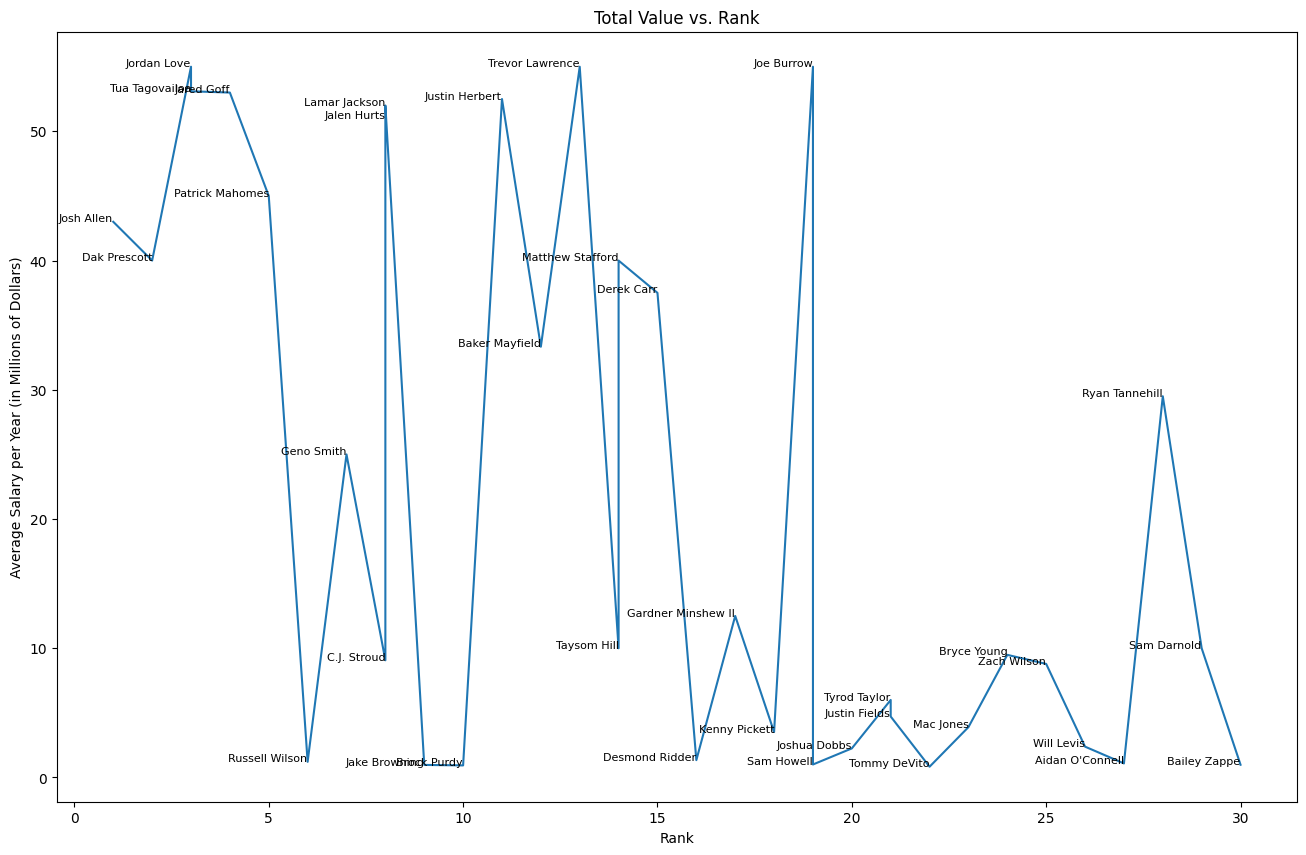

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.plot(combined['final_Rank'], combined['Avg./Year']/1000000)
plt.title('Total Value vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Average Salary per Year (in Millions of Dollars)')
for i, row in combined.iterrows():
    plt.text(row['final_Rank'], row['Avg./Year']/1000000, row['Player'], fontsize=8, ha='right')

plt.show()

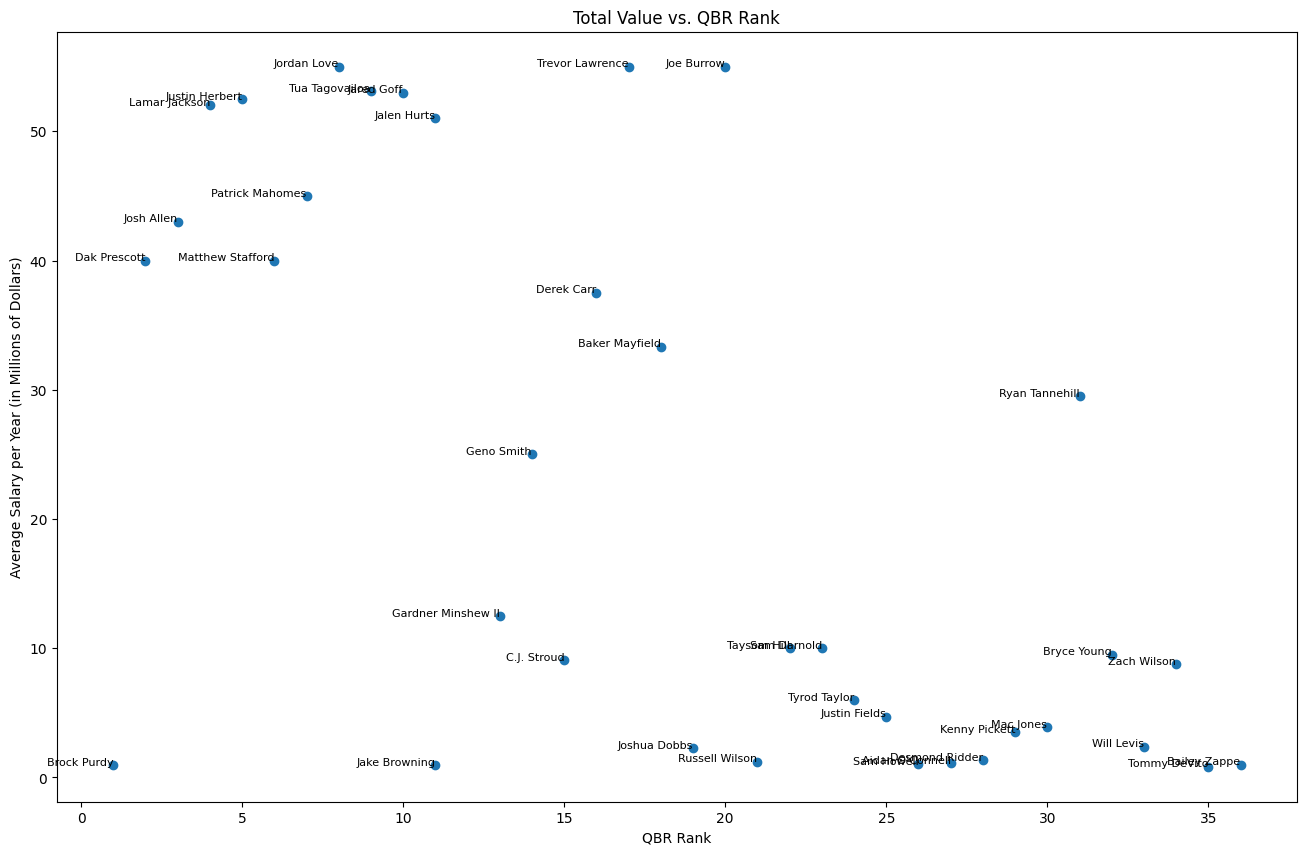

In [16]:
plt.figure(figsize=(16, 10))
plt.scatter(combined['rank_QBR'], combined['Avg./Year']/1000000)
plt.title('Total Value vs. QBR Rank')
plt.xlabel('QBR Rank')
plt.ylabel('Average Salary per Year (in Millions of Dollars)')
for i, row in combined.iterrows():
    plt.text(row['rank_QBR'], row['Avg./Year']/1000000, row['Player'], fontsize=8, ha='right')

plt.show()

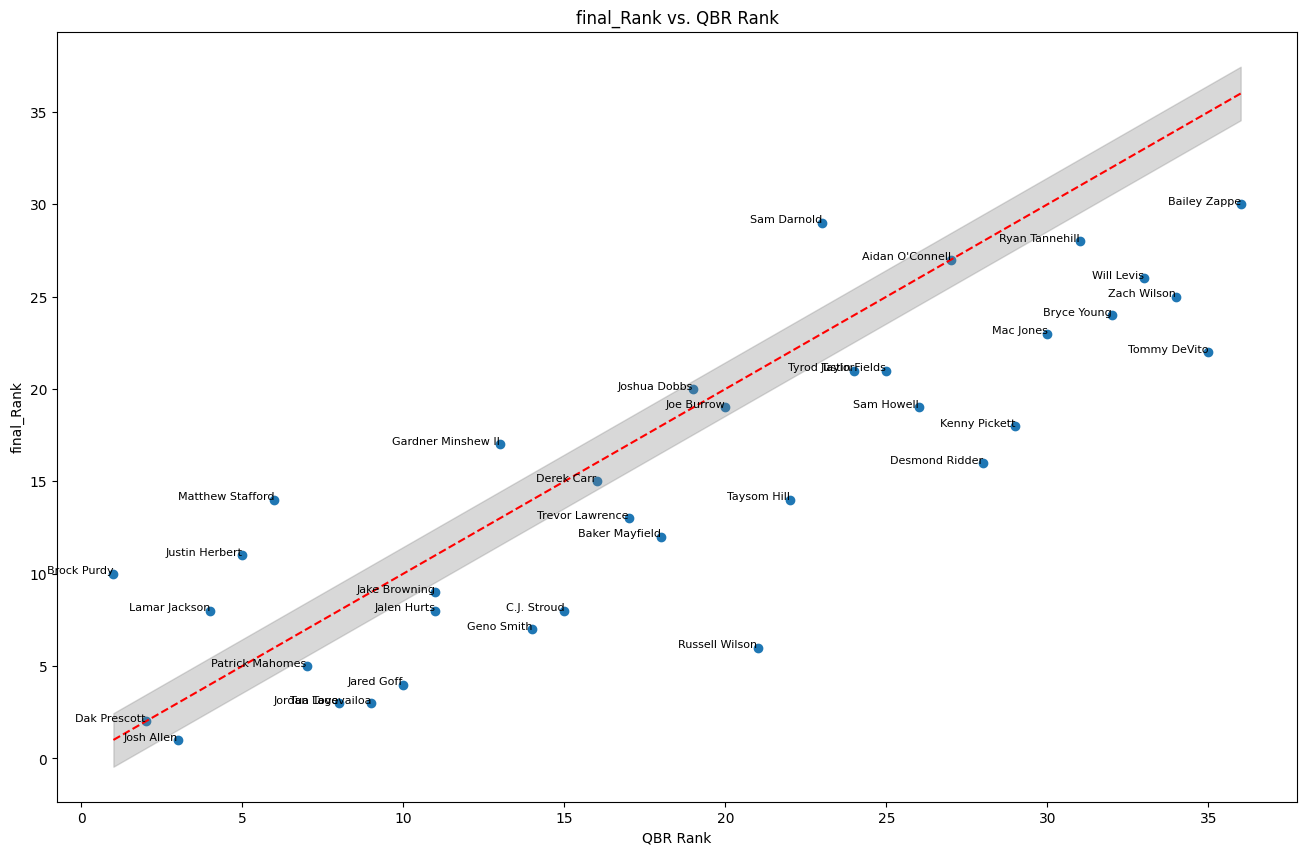

In [17]:
import numpy as np
plt.figure(figsize=(16, 10))
plt.scatter(combined['rank_QBR'], combined['final_Rank'])
plt.title('final_Rank vs. QBR Rank')
plt.xlabel('QBR Rank')
plt.ylabel('final_Rank')
for i, row in combined.iterrows():
    plt.text(row['rank_QBR'], row['final_Rank'], row['Player'], fontsize=8, ha='right')

x = np.linspace(combined['rank_QBR'].min(), combined['rank_QBR'].max(), 100)
y = x
plt.plot(x, y, color='red', linestyle='--')

y_upper = y + (0.05 * (combined['final_Rank'].max() - combined['final_Rank'].min()))
y_lower = y - (0.05 * (combined['final_Rank'].max() - combined['final_Rank'].min()))
plt.fill_between(x, y_lower, y_upper, color='grey', alpha=0.3)

plt.show()

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

features = ['Yds', 'Cmp%', 'TD/Int', 'ANY/A', 'Sk', 'GWD', '4QC', 'rushing_yds']
target = 'Avg./Year'


combined.replace([np.inf, -np.inf], np.nan, inplace=True)
combined.dropna(subset=features + [target], inplace=True)

josh_allen_data = combined.loc[combined['Player'] == 'Josh Allen', features + ['final_Rank']]

X = combined[features]
y = combined[target]

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Predict the salary for Josh Allen based on his features
predicted_value = model.predict(josh_allen_data[features])[0]/1000000

# Results
print(f"Player: Josh Allen")
print(f"Estimated value: ${predicted_value:.2f} million per year")

Player: Josh Allen
Estimated value: $47.14 million per year


In [19]:
combined.to_csv('final.csv')